In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div>
    Before we go through the code, let us define what clustering is and what it is used for.
</div>
<div style="font-family: 'Playfair Display', serif;  letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;">
    <h3 style="color: #1A132F;font-weight:bold">Clustering</h3>
    <p style="font-size: 110%;color: black;">Clustering is an unsupervised machine learning technique that groups similar data points together.</p>
    <h3 style="color: #1A132F;font-weight:bold">used for</h3>
    <p style="font-size: 110%;color: black;">discovering patterns, reducing data complexity, and improving decision-making not for prediction.</p>
</div>


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 1. Import libiraries</div>  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 2. Understanding the data</div>  

In [9]:
data=pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.shape

(200, 5)

the data is small

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" > no null values our data is clear.
    </div>  

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
numerical_col=data.select_dtypes(include=np.number).columns.to_list()

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" > Droping ID column.
    </div>  

In [8]:
data.drop(['CustomerID'],axis=1,inplace=True)
numerical_col.remove('CustomerID')

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 3. Data visualization</div>  

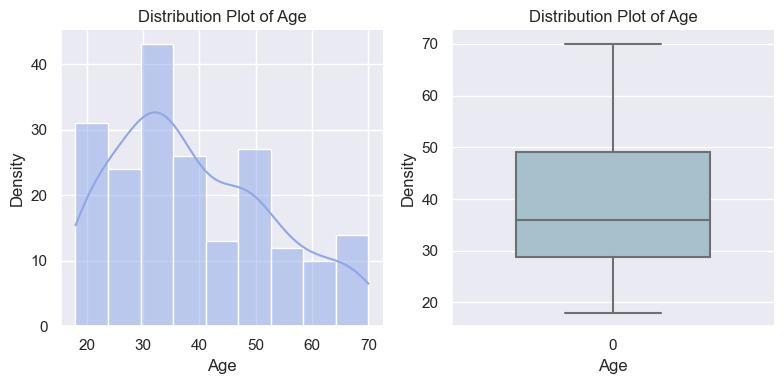

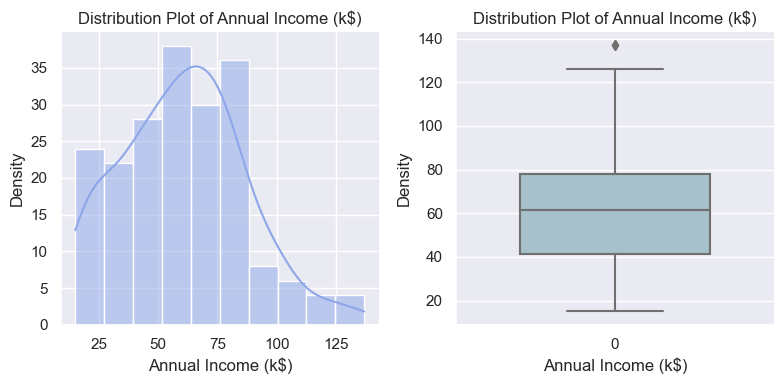

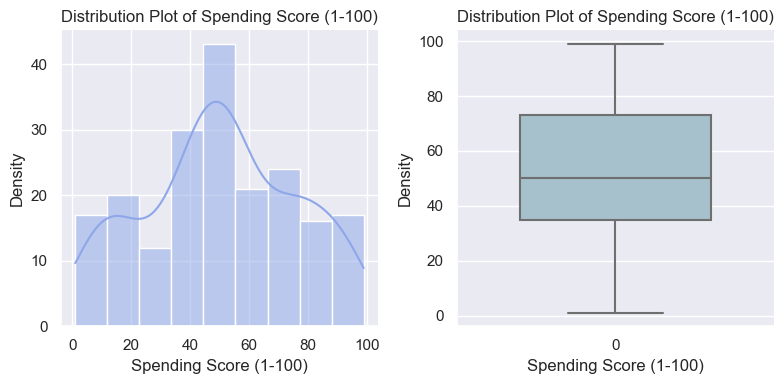

In [9]:
for i in range(len(numerical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

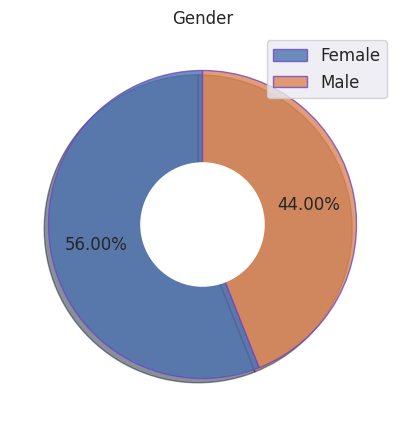

In [12]:
plt.figure(figsize=(6, 5))
plt.pie(data['Gender'].value_counts(), startangle=90,shadow=True,pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='#6C48C5'),textprops={'fontsize':12})
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender')
plt.legend(['Female', 'Male'], loc='best', fontsize=12)
plt.show()

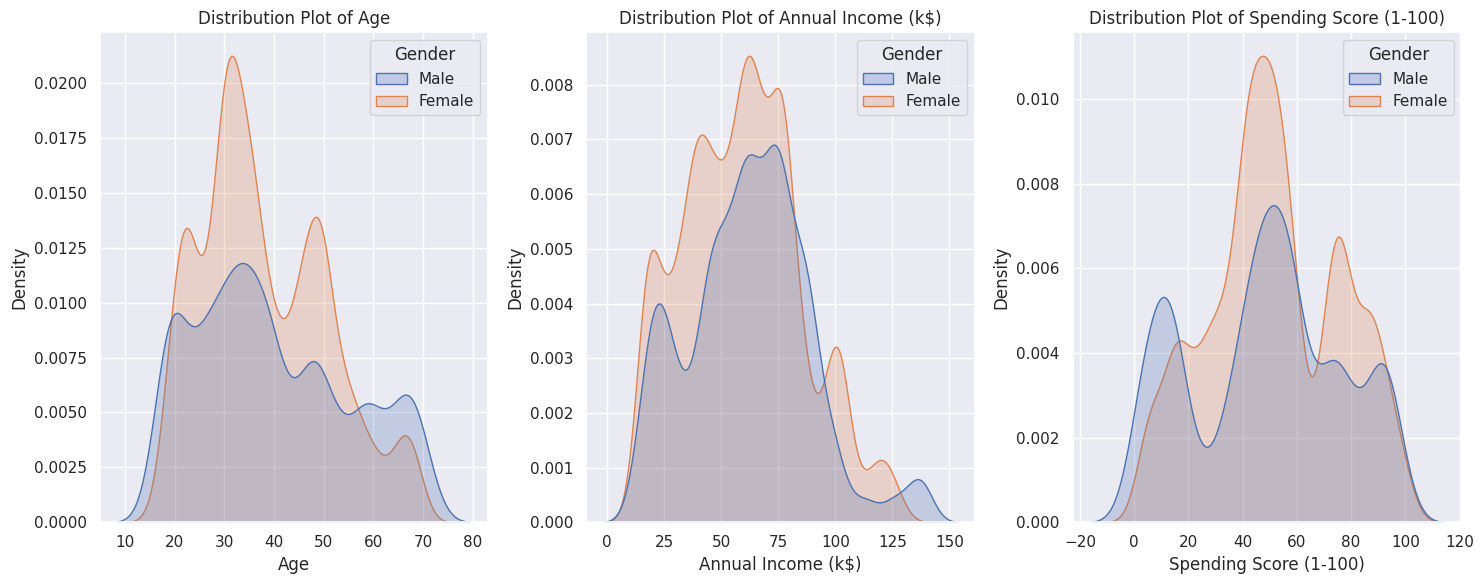

In [13]:
plt.figure(figsize=(15, 6))
for i,col in enumerate(numerical_col):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=data[col], hue=data['Gender'], shade=True, bw_adjust=.5)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
plt.show()

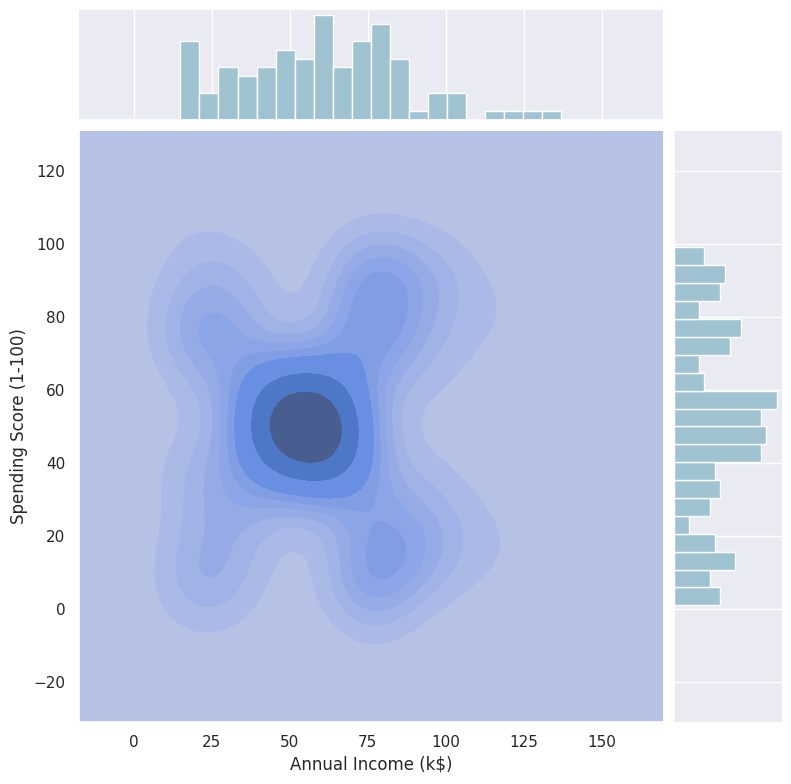

In [14]:
shap = sns.JointGrid(data = data, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
shap.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = '#8EA7E9')
shap.plot_marginals(sns.histplot, color = '#A0C3D2', alpha = 1, bins = 20);

This type of plot allows you to see both the relationship between Annual Income and Spending Score and their individual distributions in a visually clear way.

<Axes: >

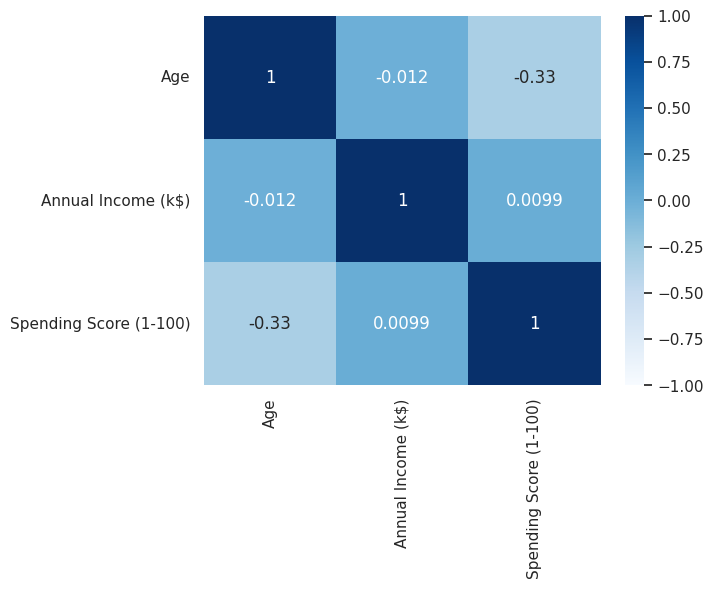

In [15]:
sns.heatmap(data[numerical_col].corr(),vmin=-1, vmax=1, annot=True,cmap='Blues')

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 4. Data prepocessing</div>  

In [16]:
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# <a id="8"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:20px; background: #CCD1E4;" > Clustering</div>  

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.1 clustering 4 variables</div>  

In [17]:
x_2D=data.iloc[:,:]

In [18]:
sc = StandardScaler()
x_2D = sc.fit_transform(x_2D)

<div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;">
    <p style="font-size: 110%;color: black;">Using PCA before visualizing clusters is helpful when you're working with higher-dimensional data, like data with 4 or more features, for the following reasons:<br>
1- If your dataset has more than two features, visualizing it directly on a 2D plot isn't possible. PCA reduces the dimensionality of the data.<br>
2- PCA helps retain the most important aspects of the data. Even after reducing the data from 4D to 2D.<br>
3- helping to remove noise and make the clusters clearer.<br></p>
</div>


In [19]:
pca = PCA(n_components=2)
x_2D = pca.fit_transform(data)

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" >choosing the number of clusters<br>
    </div>  

In [20]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)

  wcss.append(kmeans.inertia_)


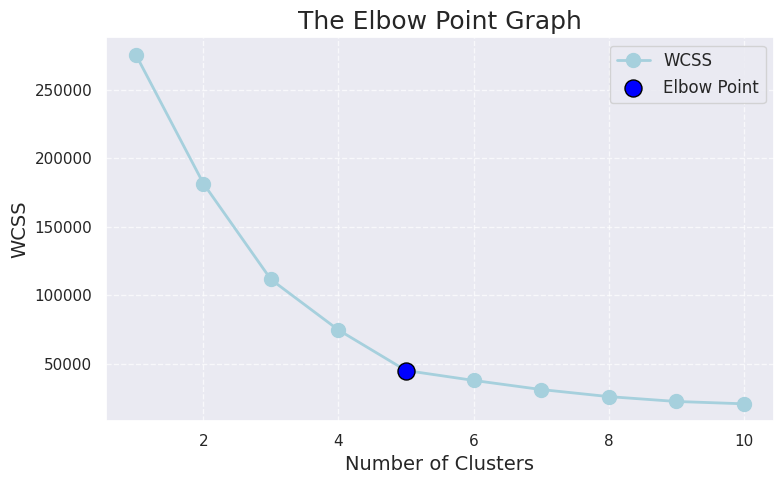

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" >implement clustering with the optimal number of clustres
    </div>  

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" >visualize the clusters
    </div>  

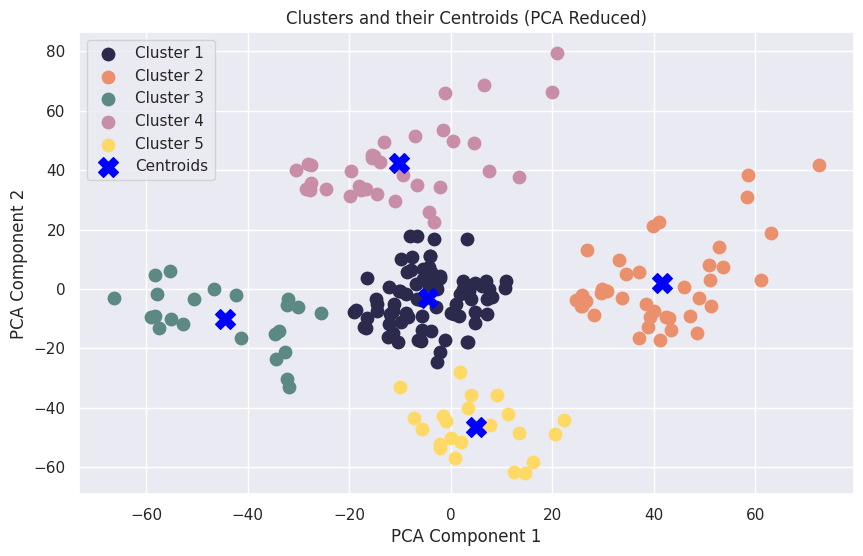

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.2 Clustring anual income & spending score</div>  

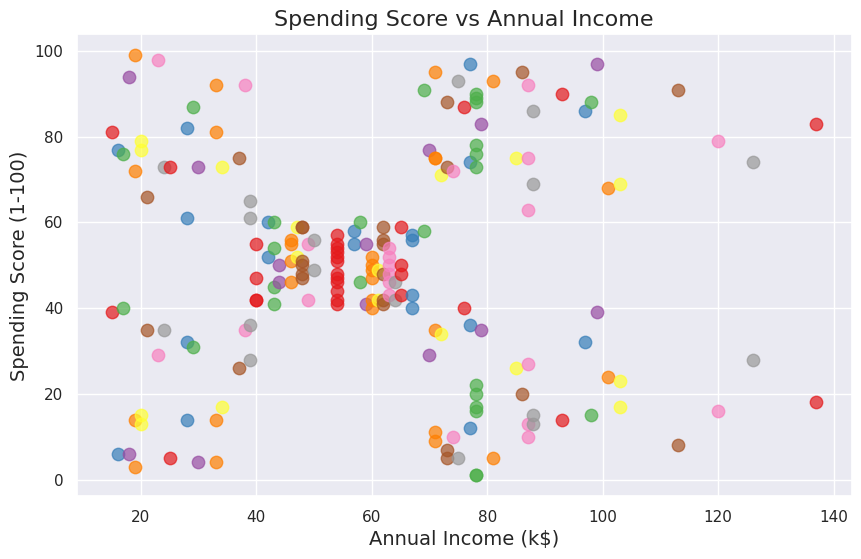

In [24]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))

for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score vs Annual Income', fontsize=16)

In [25]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)

In [26]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)

  wcss.append(kmeans.inertia_)


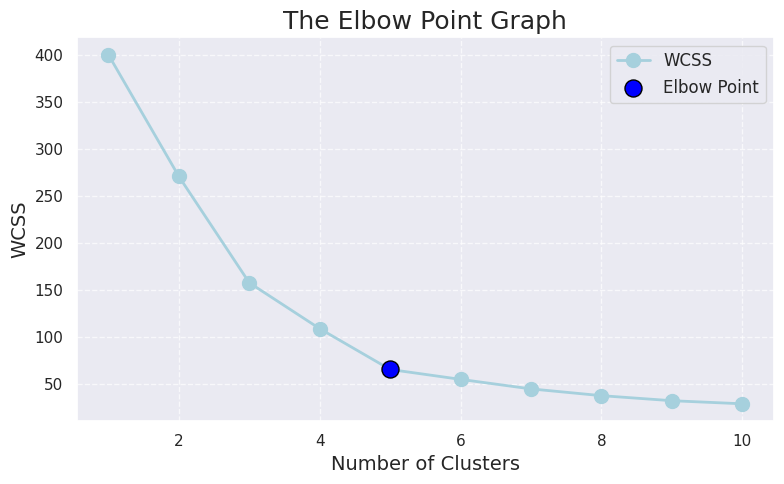

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

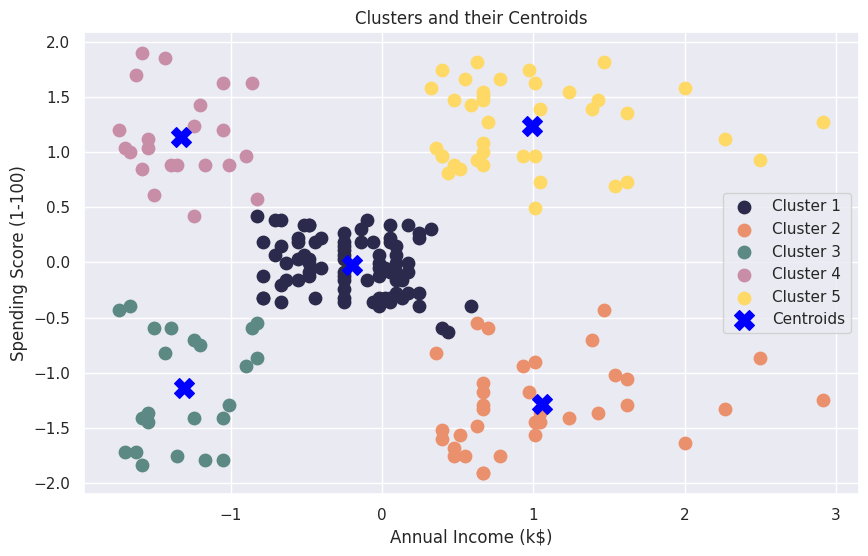

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')
plt.scatter(x_2D[y == 4, 0], x_2D[y == 4, 1], s=80, c='#FFD966', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#  <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.3 Clustering anual income & age</div>  

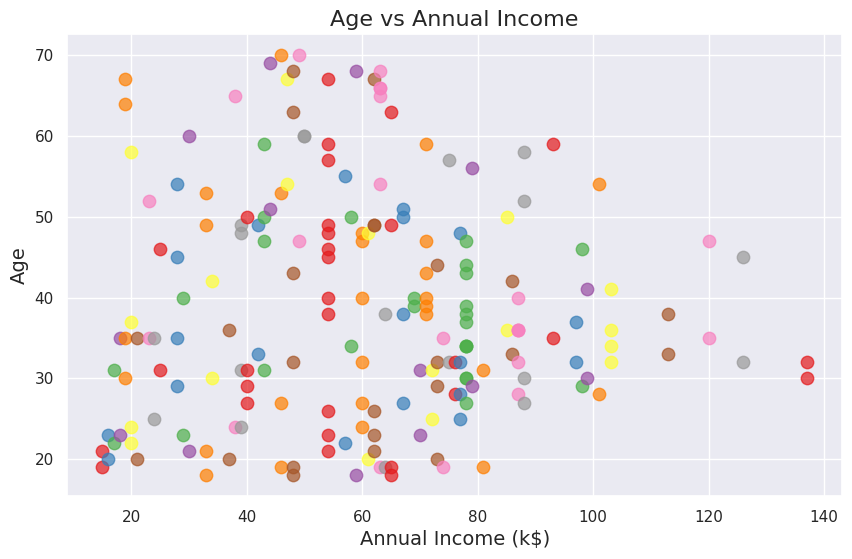

In [30]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Annual Income (k$)'].unique()))

for i, income in enumerate(data['Annual Income (k$)'].unique()):
    filt = data[data['Annual Income (k$)'] == income]
    plt.scatter([income] * len(filt), filt['Age'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Age', fontsize=14)
    plt.title('Age vs Annual Income', fontsize=16)

In [31]:
x_2D=data.iloc[:,[1,2]]
x_2D=sc.fit_transform(x_2D)

In [32]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)

  wcss.append(kmeans.inertia_)

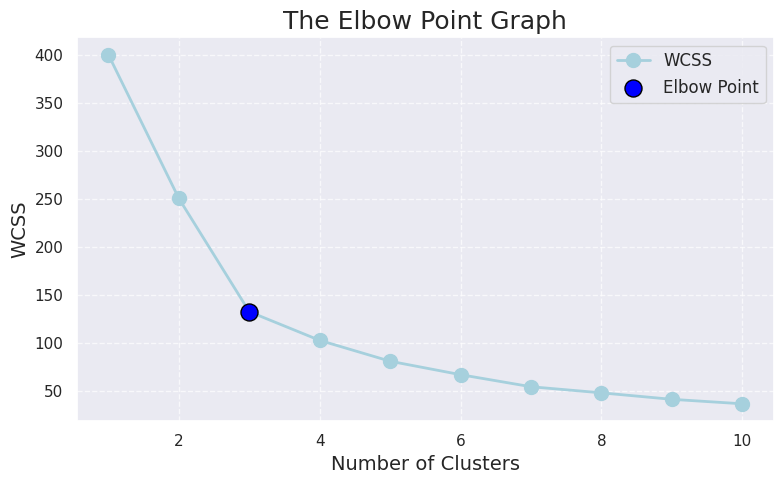

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

elbow_point = 3
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [34]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

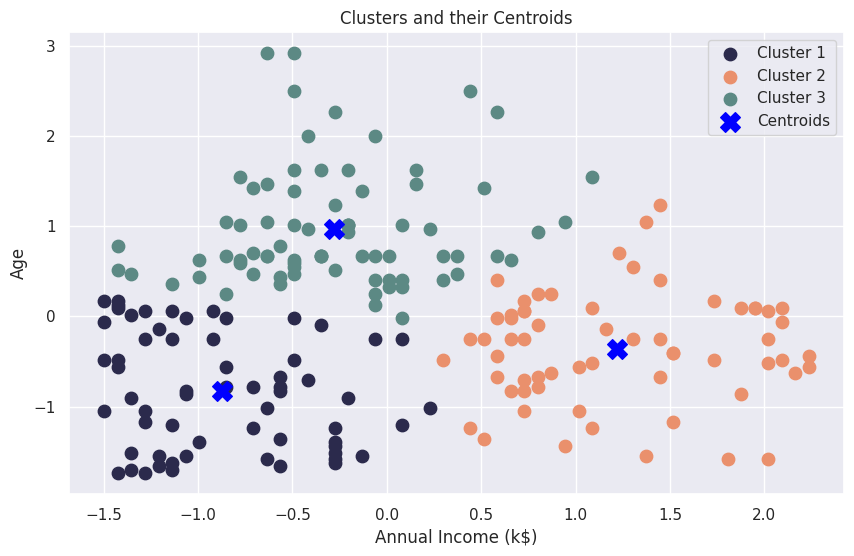

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 5.4 Clustering age and spending score</div>  

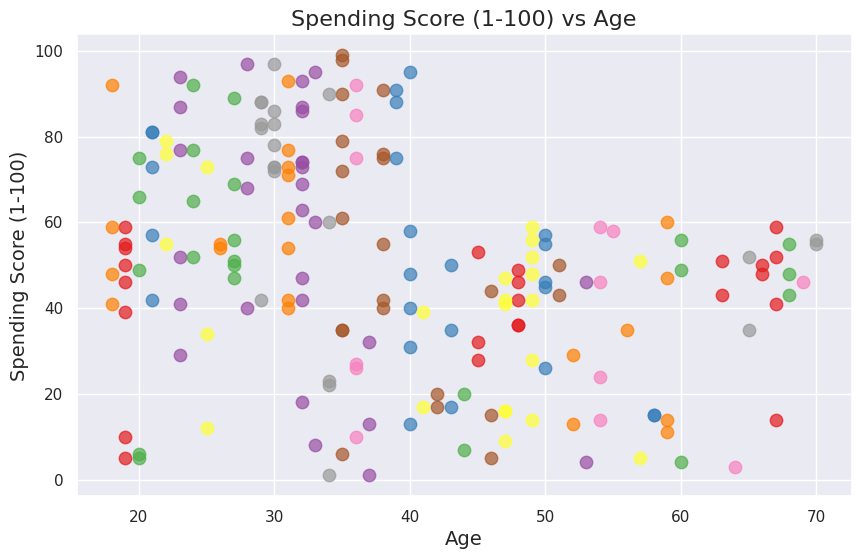

In [36]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set1', n_colors=len(data['Age'].unique()))

for i, income in enumerate(data['Age'].unique()):
    filt = data[data['Age'] == income]
    plt.scatter([income] * len(filt), filt['Spending Score (1-100)'],label=f'Income: {income}k$', alpha=0.7, s=80, c=[palette[i]])
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.title('Spending Score (1-100) vs Age', fontsize=16)

In [37]:
x_2D=data.iloc[:,[1,3]]
x_2D=sc.fit_transform(x_2D)

In [38]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)

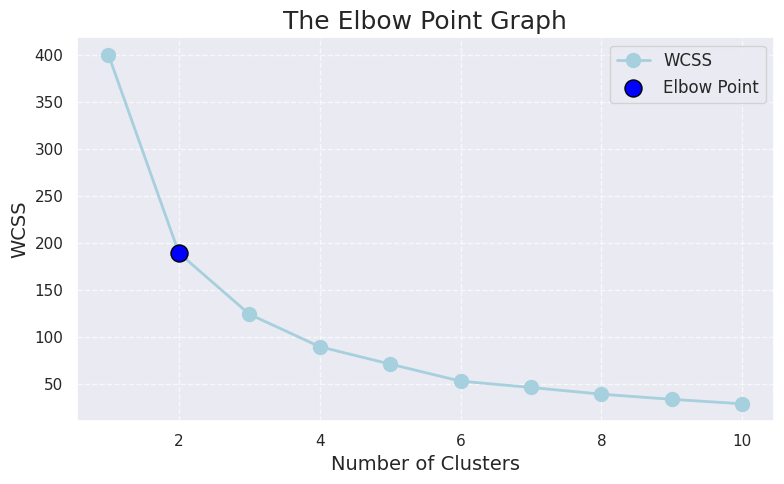

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

elbow_point = 2
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [40]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

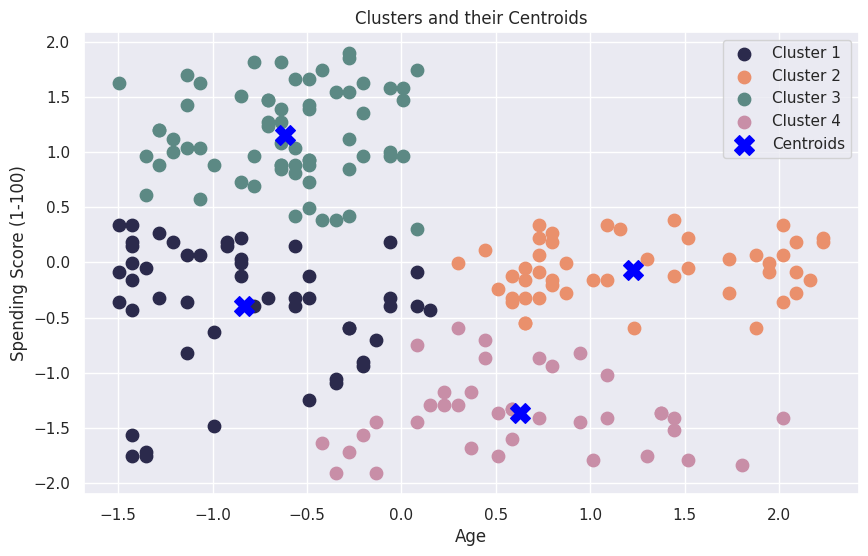

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > 6. The best clustering</div>  

 <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; padding:10px; background: #408E91; border-radius: 3px;" >We can notice from above that the best best clustering is clustering according to anual income & spending score
    </div>  

In [42]:
x_2D=data.iloc[:,[2,3]]
x_2D=sc.fit_transform(x_2D)

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

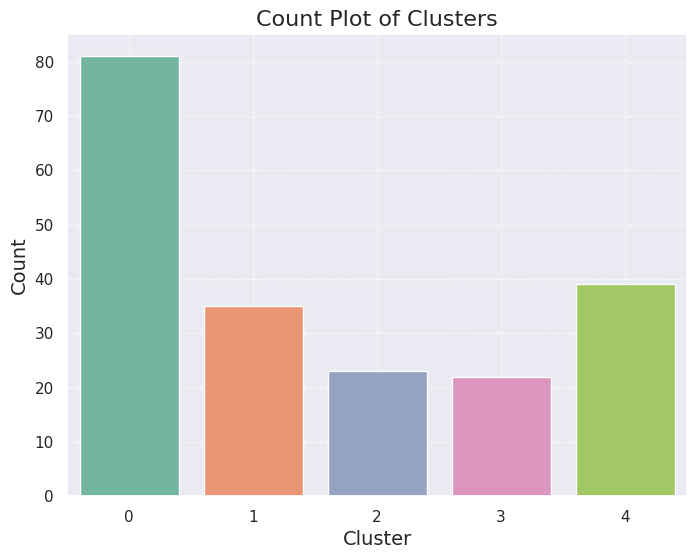

In [43]:
cluster_labels = pd.Series(y, name='Cluster')

plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_labels, palette='Set2')
plt.title('Count Plot of Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 0px; color:#1A132F; font-size:120%; text-align:center; padding:10px; background: #C6DCE4; border-radius: 25px; box-shadow: 10px 10px 5px #748DA6;" > the end</div>  